# **INITIAL CUSTOMER BEHAVIOR ANALYSIS**

The dataset consist of only one-off purchases. In this notebook I will analyze purchase behavior and customer attributes by:

1. **Demographic Segmentation:**
Segment customers based on demographic attributes like gender, age, and location. Use customer data (age, gender, location) to group customers into different demographic categories:
Example Segments: Young vs. older customers, male vs. female.
Analyze how these groups differ in terms of spending, product preferences, or shopping malls.

2. **Purchase Behavioral Segmentation:**
Segment based on what customers buy (category), how much they buy (quantity), and where they shop (shopping_mall). Use transactional data to group customers based on:
Purchase Categories: Customers buying similar product categories.
Price Sensitivity: Customers buying low-cost vs. high-cost products to group them by their spending levels (e.g., high spenders vs. low spenders).
Shopping Mall Preferences: Customers shopping at specific malls (luxury malls vs. budget-friendly malls).
This can help identify patterns in customer behavior, such as budget-conscious vs. premium customers.

3. **Product-Based Segmentation:**
Segment customers by the type of products they purchase (using the category column).
Identify which customer groups prefer specific product types and adjust marketing strategies accordingly.

4. **Spending Patterns:**
Group customers by their spending levels (e.g., high spenders vs. low spenders).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#load the datasets
sales = pd.read_csv("sales_data.csv")
customer = pd.read_csv("customer_data.csv")
mall = pd.read_csv("shopping_mall_data.csv")

In [3]:
sales.head(5)

,invoice_no,customer_id,category,quantity,invoice date,price,shopping_mall
0,I138884,C241288,Clothing,5,05/08/2022,1500.40,South Coast Plaza
1,I317333,C111565,Shoes,3,12/12/2021,1800.51,Beverly Center
2,I127801,C266599,Clothing,1,09/11/2021,300.08,Westfield Century City
3,I173702,C988172,Shoes,5,05/16/2021,3000.85,Stanford Shopping Center
4,I337046,C189076,Books,4,10/24/2021,60.60,South Coast Plaza


In [4]:
customer.head(5)

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [5]:
mall.head(5)

,shopping_mall,construction_year,area (sqm),location,store_count
0,South Coast Plaza,1967,"250,000",Costa Mesa,270
1,Westfield Valley Fair,1986,"220,000",Santa Clara,230
2,The Grove,2002,"56,000",Los Angeles,140
3,Westfield Century City,1964,"133,000",Los Angeles,200
4,Beverly Center,1982,"111,000",Los Angeles,160


In [6]:
#mearge the data
df = pd.merge(sales, customer,  on= "customer_id")
df.head(5)

,invoice_no,customer_id,category,quantity,invoice date,price,shopping_mall,gender,age,payment_method
0,I138884,C241288,Clothing,5,05/08/2022,1500.40,South Coast Plaza,Female,28.0,Credit Card
1,I317333,C111565,Shoes,3,12/12/2021,1800.51,Beverly Center,Male,21.0,Debit Card
2,I127801,C266599,Clothing,1,09/11/2021,300.08,Westfield Century City,Male,20.0,Cash
3,I173702,C988172,Shoes,5,05/16/2021,3000.85,Stanford Shopping Center,Female,66.0,Credit Card
4,I337046,C189076,Books,4,10/24/2021,60.60,South Coast Plaza,Female,53.0,Cash


In [7]:
data = pd.merge(df, mall, on = "shopping_mall")
data.head(5)

,invoice_no,customer_id,category,quantity,invoice date,price,shopping_mall,gender,age,payment_method,construction_year,area (sqm),location,store_count
0,I138884,C241288,Clothing,5,05/08/2022,1500.40,South Coast Plaza,Female,28.0,Credit Card,1967,"250,000",Costa Mesa,270
1,I337046,C189076,Books,4,10/24/2021,60.60,South Coast Plaza,Female,53.0,Cash,1967,"250,000",Costa Mesa,270
2,I326945,C283361,Clothing,2,08/22/2021,600.16,South Coast Plaza,Female,60.0,Credit Card,1967,"250,000",Costa Mesa,270
3,I336189,C555402,Clothing,2,03/06/2022,600.16,South Coast Plaza,Female,67.0,Credit Card,1967,"250,000",Costa Mesa,270
4,I252275,C313348,Technology,5,10/26/2021,5250.00,South Coast Plaza,Male,44.0,Cash,1967,"250,000",Costa Mesa,270


## Explore the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94466 entries, 0 to 94465
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   invoice_no         94466 non-null  object 
 1   customer_id        94466 non-null  object 
 2   category           94466 non-null  object 
 3   quantity           94466 non-null  int64  
 4   invoice date       94466 non-null  object 
 5   price              94466 non-null  float64
 6   shopping_mall      94466 non-null  object 
 7   gender             94466 non-null  object 
 8   age                94349 non-null  float64
 9   payment_method     94466 non-null  object 
 10  construction_year  94466 non-null  int64  
 11  area (sqm)         94466 non-null  object 
 12  location           94466 non-null  object 
 13  store_count        94466 non-null  int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 10.1+ MB


In [9]:
data.isnull().sum()

invoice_no             0
customer_id            0
category               0
quantity               0
invoice date           0
price                  0
shopping_mall          0
gender                 0
age                  117
payment_method         0
construction_year      0
area (sqm)             0
location               0
store_count            0
dtype: int64

There are only few missing values in age column. So I delete them

In [10]:
data.dropna(inplace = True)

In [11]:
data.isnull().sum()

invoice_no           0
customer_id          0
category             0
quantity             0
invoice date         0
price                0
shopping_mall        0
gender               0
age                  0
payment_method       0
construction_year    0
area (sqm)           0
location             0
store_count          0
dtype: int64

In [12]:
pd.crosstab(data.customer_id, data.category)

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
customer_id,,,,,,,,
C100004,0,1,0,0,0,0,0,0
C100005,0,0,0,0,1,0,0,0
C100012,0,0,0,1,0,0,0,0
C100019,0,0,0,0,0,0,0,1
C100025,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
C999886,0,0,0,1,0,0,0,0
C999910,1,0,0,0,0,0,0,0
C999974,0,1,0,0,0,0,0,0


In [13]:
data.customer_id.nunique()

94349

In [14]:
data.shape

(94349, 14)

All customers are unique (one-time buyers). So do customer segmentation based on other features and exclude customer_id

In [15]:
data.groupby("category")["quantity"].sum()

category
Books              14173
Clothing           98260
Cosmetics          43253
Food & Beverage    41939
Shoes              28685
Souvenir           14135
Technology         14239
Toys               28730
Name: quantity, dtype: int64

In [16]:
data.quantity.unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [17]:
pd.crosstab(data.quantity, data.category, margins=True, margins_name="Total")

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys,Total
quantity,,,,,,,,,
1,935,6480,2831,2834,1843,975,930,1891,18719
2,961,6597,2837,2748,1947,937,961,1860,18848
3,946,6567,2896,2845,1902,1018,950,1968,19092
4,902,6485,2880,2736,1923,873,953,1975,18727
5,974,6589,2908,2826,1910,948,945,1863,18963
Total,4718,32718,14352,13989,9525,4751,4739,9557,94349


In [18]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [19]:
pd.crosstab(data.gender, data.category, margins = True, margins_name = "Total")

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys,Total
gender,,,,,,,,,
Female,2753,19612,8619,8346,5652,2879,2838,5775,56474
Male,1965,13106,5733,5643,3873,1872,1901,3782,37875
Total,4718,32718,14352,13989,9525,4751,4739,9557,94349


In [20]:
pd.crosstab(data.age, data.category, margins = True, margins_name = "Total")

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys,Total
age,,,,,,,,,
18.0,97,617,258,267,164,103,80,167,1753
19.0,87,649,271,278,194,84,82,186,1831
20.0,86,613,259,273,190,80,74,190,1765
21.0,82,633,271,271,190,100,87,210,1844
22.0,102,701,296,269,175,103,109,194,1949
23.0,91,600,265,296,193,78,82,202,1807
24.0,107,639,255,295,189,98,103,187,1873
25.0,96,625,282,240,178,94,97,171,1783
26.0,81,624,266,257,194,103,82,176,1783


## **Purchase Behavioral Segmentation**

Segment based on what customers buy (category), how much they buy (quantity), and where they shop (shopping_mall), spending pattern (how much they spend - quantity * price).

In [21]:
data.columns

Index(['invoice_no', 'customer_id', 'category', 'quantity', 'invoice date',
       'price', 'shopping_mall', 'gender', 'age', 'payment_method',
       'construction_year', 'area (sqm)', 'location', 'store_count'],
      dtype='object')

### **Feature engineering**

We need to multiply quantity with price to get the Sales amount for that transaction.

In [22]:
data["total_sales"] = data["quantity"] * data["price"]
data.head()

,invoice_no,customer_id,category,quantity,invoice date,price,shopping_mall,gender,age,payment_method,construction_year,area (sqm),location,store_count,total_sales
0,I138884,C241288,Clothing,5,05/08/2022,1500.40,South Coast Plaza,Female,28.0,Credit Card,1967,"250,000",Costa Mesa,270,7502.00
1,I337046,C189076,Books,4,10/24/2021,60.60,South Coast Plaza,Female,53.0,Cash,1967,"250,000",Costa Mesa,270,242.40
2,I326945,C283361,Clothing,2,08/22/2021,600.16,South Coast Plaza,Female,60.0,Credit Card,1967,"250,000",Costa Mesa,270,1200.32
3,I336189,C555402,Clothing,2,03/06/2022,600.16,South Coast Plaza,Female,67.0,Credit Card,1967,"250,000",Costa Mesa,270,1200.32
4,I252275,C313348,Technology,5,10/26/2021,5250.00,South Coast Plaza,Male,44.0,Cash,1967,"250,000",Costa Mesa,270,26250.00


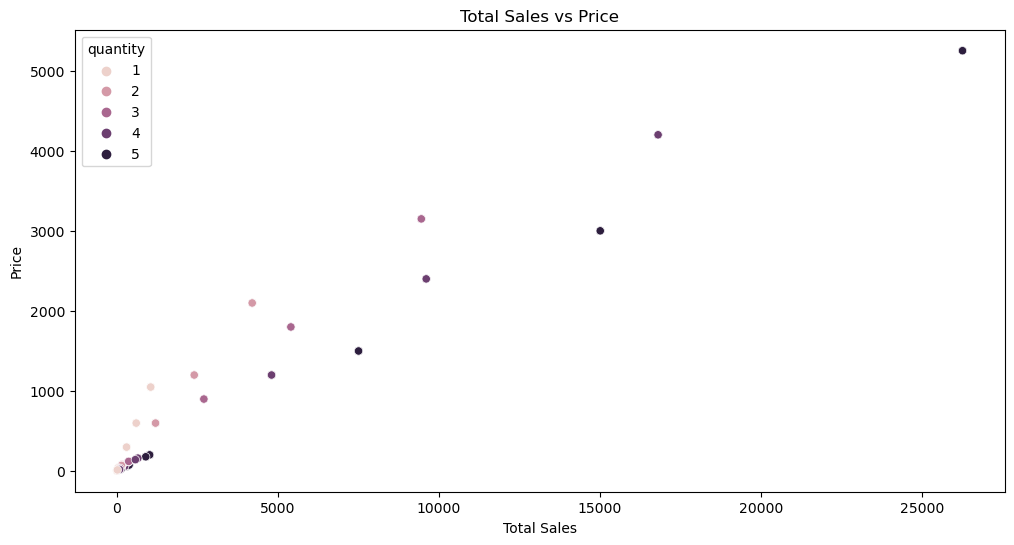

In [23]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data, x = "total_sales", y = "price", hue = "quantity")
plt.title("Total Sales vs Price")
plt.ylabel("Price")
plt.xlabel("Total Sales")
plt.show()

Most customers bought low-priced products

In [24]:
#Select Features for Clustering
features = data[["quantity", "total_sales", "age", "price"]]

In [25]:
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [26]:
# Apply KMeans Clustering 
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

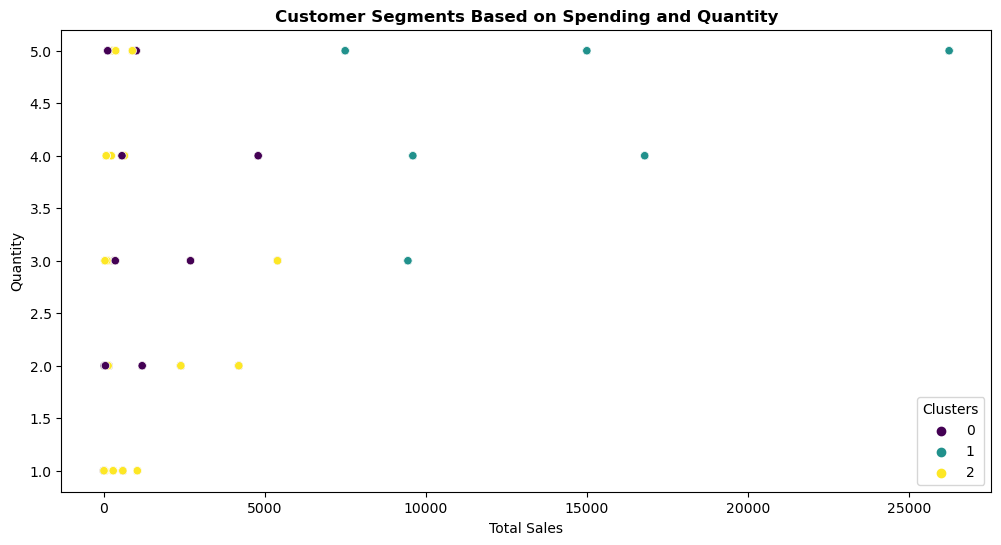

In [27]:
# Visualize Clusters 
plt.figure(figsize = (12, 6))
sns.scatterplot(
    x = data['total_sales'],
    y = data['quantity'],
    hue = data['cluster'],
    #style = data['quantity'],
    palette ='viridis'
)
plt.title('Customer Segments Based on Spending and Quantity', weight = "bold")
plt.xlabel('Total Sales')
plt.ylabel('Quantity')
plt.legend(title = 'Clusters')
plt.show()

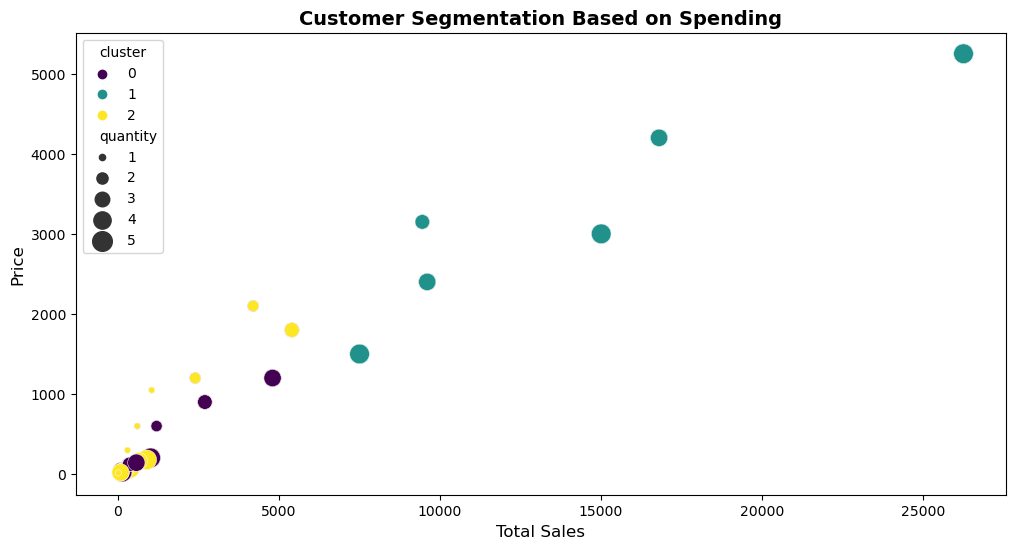

In [28]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data, x = "total_sales", y = "price", hue = "cluster", size = "quantity", sizes=(20, 200), palette = "viridis")
plt.title("Customer Segmentation Based on Spending", weight = "bold", fontsize = 14)
plt.ylabel("Price", fontsize = 12)
plt.xlabel("Total Sales", fontsize = 12)
plt.show()

### **Spending pattern and price Sensitivity**

In [29]:
# Analysis of Clusters for spending level, buying behavior and age distribution
cluster_summary = data.groupby('cluster').agg(
    avg_total_sales = ('total_sales', 'mean'),
    customer_count = ('customer_id', 'count'),
    avg_age=('age', 'mean'),
    avg_price = ('price', 'mean'),
    min_price = ('price', 'min'),
    max_price = ('price', 'max'),
    avg_quantity = ('quantity', 'mean'),
    min_quantity = ('quantity', 'min'),
    max_quantity = ('quantity', 'max')
).reset_index()

print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
    cluster  avg_total_sales  customer_count    avg_age    avg_price  \
0        0      1115.233426           40056  56.550230   397.442854   
1        1     10857.918232           13685  43.535038  2406.856294   
2        2      1116.119831           40608  30.474069   398.520083   

   min_price  max_price  avg_quantity  min_quantity  max_quantity  
0       5.23     2100.0      2.732250             1             5  
1    1500.40     5250.0      4.590354             3             5  
2       5.23     2100.0      2.737195             1             5  


In [30]:
data.columns

Index(['invoice_no', 'customer_id', 'category', 'quantity', 'invoice date',
       'price', 'shopping_mall', 'gender', 'age', 'payment_method',
       'construction_year', 'area (sqm)', 'location', 'store_count',
       'total_sales', 'cluster'],
      dtype='object')

### **Where do customers shop?**

Is small location influencing sales?

In [31]:
pd.crosstab(data.location, data.cluster, margins = True, margins_name = "Total")

cluster,0,1,2,Total
location,,,,
Costa Mesa,8437,2891,8477,19805
Glendale,2055,712,2143,4910
Los Angeles,10603,3548,10593,24744
Palo Alto,4226,1449,4471,10146
San Diego,2203,723,2139,5065
Santa Clara,4115,1424,4226,9765
Torrance,8417,2938,8559,19914
Total,40056,13685,40608,94349


In [32]:
pd.crosstab(data.shopping_mall, data.cluster, margins = True, margins_name = "Total")

cluster,0,1,2,Total
shopping_mall,,,,
Beverly Center,2121,720,2102,4943
Del Amo Fashion Center,8417,2938,8559,19914
Fashion Valley,2203,723,2139,5065
Glendale Galleria,2055,712,2143,4910
South Coast Plaza,8437,2891,8477,19805
Stanford Shopping Center,4226,1449,4471,10146
The Grove,2031,702,2072,4805
Westfield Century City,6451,2126,6419,14996
Westfield Valley Fair,4115,1424,4226,9765


### Does the size of the shopping mall influence sales?

In [33]:
data.rename(columns = {"area (sqm)": "area_sqm"}, inplace = True)

In [34]:
pd.crosstab(data.area_sqm, data.cluster, margins = True, margins_name = "Total")

cluster,0,1,2,Total
area_sqm,,,,
"111,000",2121,720,2102,4943
"120,000",4226,1449,4471,10146
"133,000",6451,2126,6419,14996
"145,000",2055,712,2143,4910
"161,000",2203,723,2139,5065
"220,000",4115,1424,4226,9765
"232,000",8417,2938,8559,19914
"250,000",8437,2891,8477,19805
"56,000",2031,702,2072,4805


In [35]:
pd.crosstab(data.store_count, data.cluster, margins = True, margins_name = "Total")

cluster,0,1,2,Total
store_count,,,,
140,6257,2151,6543,14951
160,2121,720,2102,4943
180,2203,723,2139,5065
190,2055,712,2143,4910
200,6451,2126,6419,14996
220,8417,2938,8559,19914
230,4115,1424,4226,9765
270,8437,2891,8477,19805
Total,40056,13685,40608,94349


In [36]:
mall_summary = data.groupby("cluster").agg(
    customer_count = ('customer_id', 'count'), 
    no_stores = ("store_count", "mean")).reset_index()

print("mall_summary:\n", mall_summary)

mall_summary:
    cluster  customer_count   no_stores
0        0           40056  208.925255
1        1           13685  209.090976
2        2           40608  208.630812


### **Product preferences**

In [37]:
pd.crosstab(data.category, data.cluster, margins = True, margins_name = "Total")

cluster,0,1,2,Total
category,,,,
Books,2354,0,2364,4718
Clothing,12947,6589,13182,32718
Cosmetics,7225,0,7127,14352
Food & Beverage,6899,0,7090,13989
Shoes,2658,4248,2619,9525
Souvenir,2343,0,2408,4751
Technology,905,2848,986,4739
Toys,4725,0,4832,9557
Total,40056,13685,40608,94349


### **Gender and age distribution**

In [38]:
pd.crosstab(data.gender, data.cluster, margins = True, margins_name = "Total")

cluster,0,1,2,Total
gender,,,,
Female,24056,8152,24266,56474
Male,16000,5533,16342,37875
Total,40056,13685,40608,94349


In [39]:
age_distribution = data.groupby("cluster").agg(
    min_age = ("age", "min"),
    max_age = ("age", "max"),
    avg_age = ("age", "mean")).reset_index()

print("Age distribution:\n", age_distribution)

Age distribution:
    cluster  min_age  max_age    avg_age
0        0     44.0     69.0  56.550230
1        1     18.0     69.0  43.535038
2        2     18.0     43.0  30.474069


## **Conclusions**

### Customer Segments

### **Category 1: Old budget-conscious low spenders**

Cluster 0: These old price conscious customers buy between 1 and 5 low cost products from all categories. The minimum age in this category is 44 years old. They shop everywhere but will not buy any product costing more than $2,100. These customers are likely to respond well to price sensitive promotions such as discounts and coupons.

### **Category 2: High spenders premium customers** 

Cluster 1: These customers are not price conscious. They buy high-cost products in large quantities and mainly prefer clothing, shoes and technology. They include customers from all age groups with an average age of 43.5 years. There are only few premium customers.

### **Category 3: Young budget-conscious low spenders**

Cluster 2: These are low spenders who buy all types of low-cost products in small or large quantities. They range from 18 years to 43 years old customers who will not buy any product costing more than $2,100. These customers are likely to respond well to price sensitive promotions such as discounts and coupons.

*author: frida*